In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

Load the dataset

In [3]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is loaded')

Dataset is loaded


In [4]:
paths[:5]

['/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_youth_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_near_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_search_fear.wav',
 '/kaggle/input/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/YAF_fear/YAF_pick_fear.wav']

In [5]:
labels[:5]

['fear', 'fear', 'fear', 'fear', 'fear']

In [6]:
#creating a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [7]:
df['label'].value_counts()

label
fear       800
angry      800
disgust    800
neutral    800
sad        800
ps         800
happy      800
Name: count, dtype: int64

Exploratory data analysis

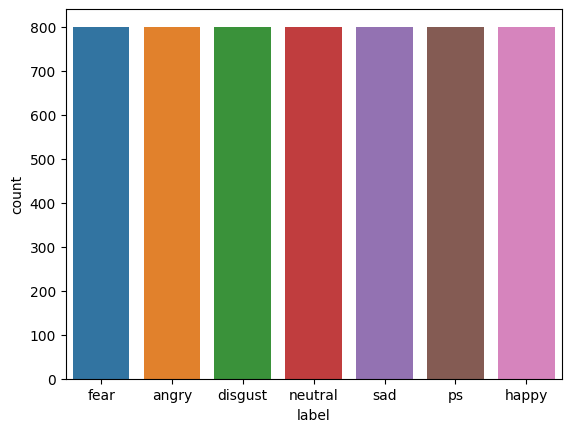

In [8]:

sns.countplot(x=df['label'])
plt.show()


In [9]:
def waveplot(data,sr,emotion):
    plt.figure(figsize =(10,4))
    plt.title(emotion,size = 20)
    librosa.display.waveshow(data,sr = sr)
    plt.show()
    
def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10, 4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()
    

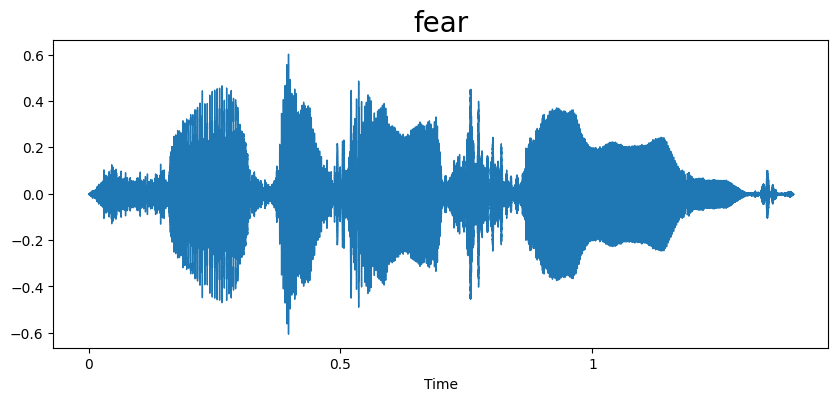

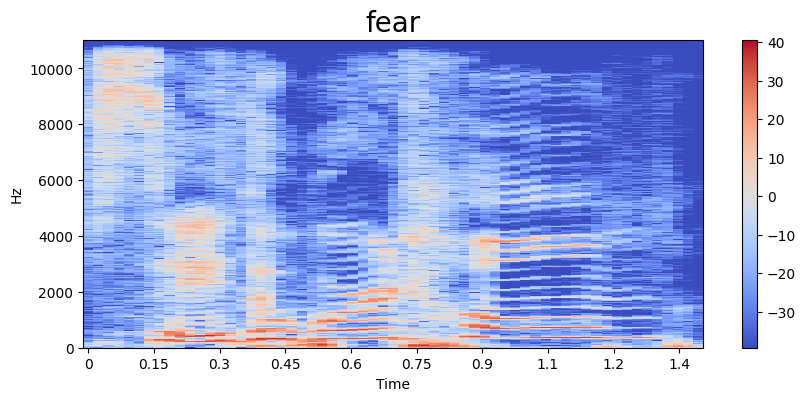

In [10]:
emotion = 'fear'
path = df['speech'][df['label']==emotion][0]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

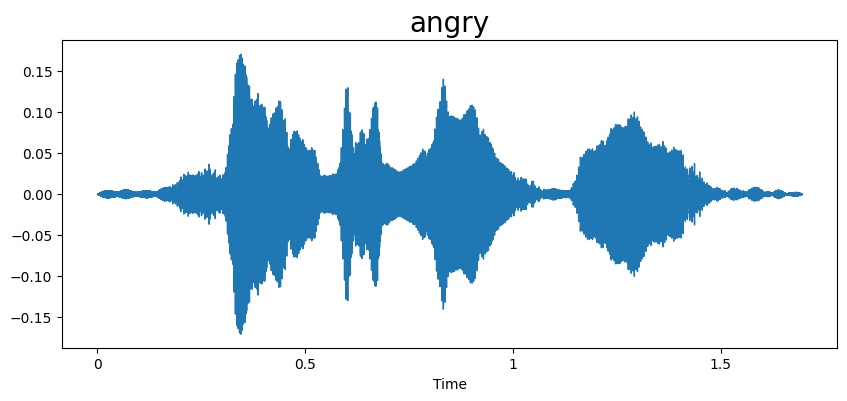

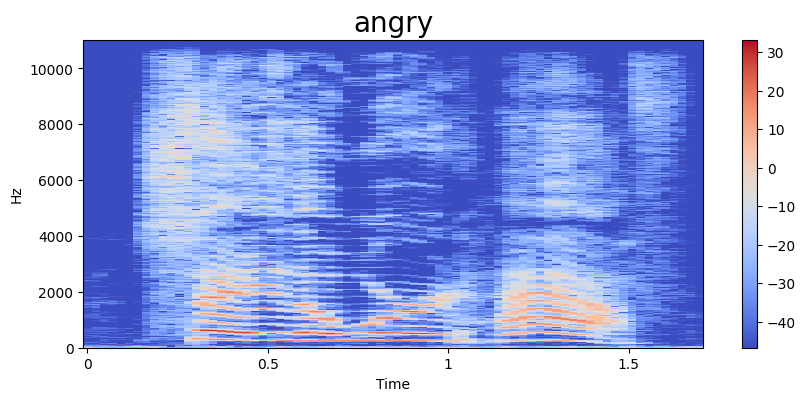

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

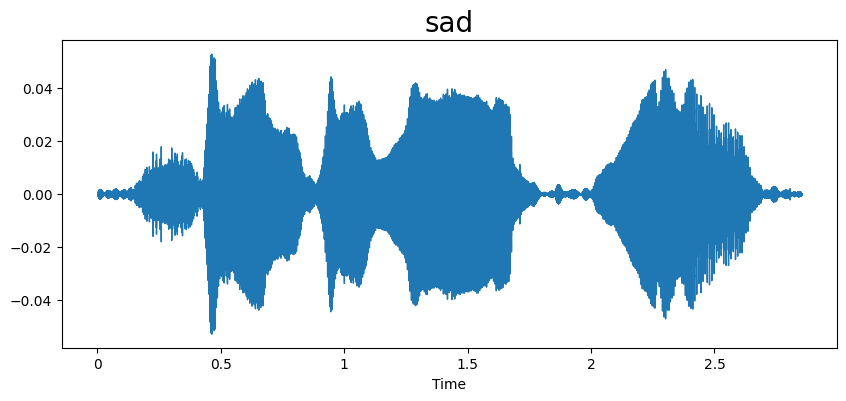

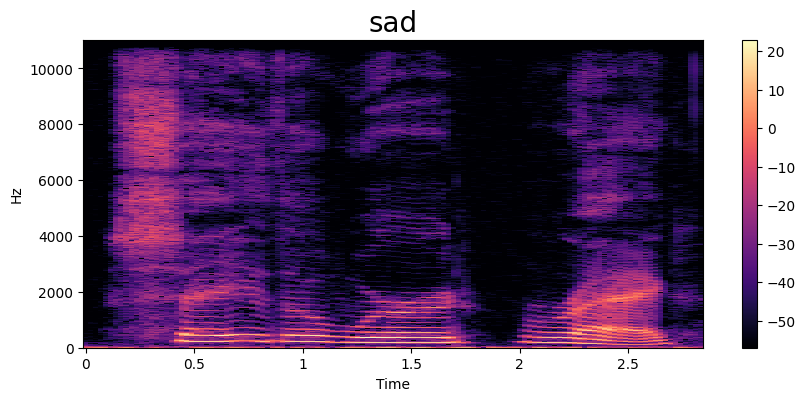

In [12]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[2]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

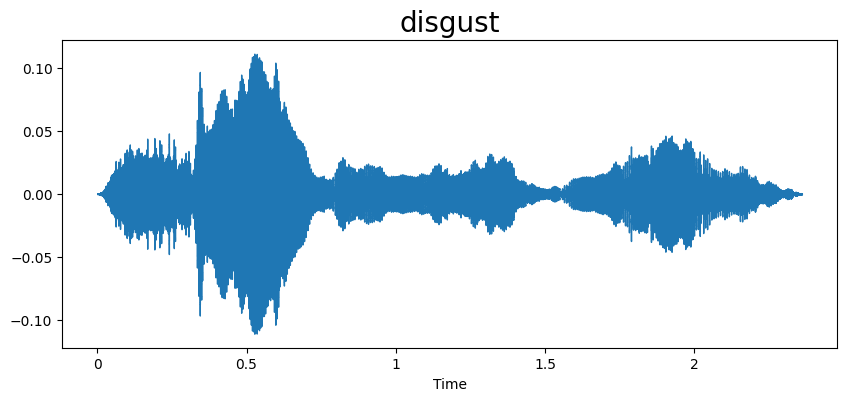

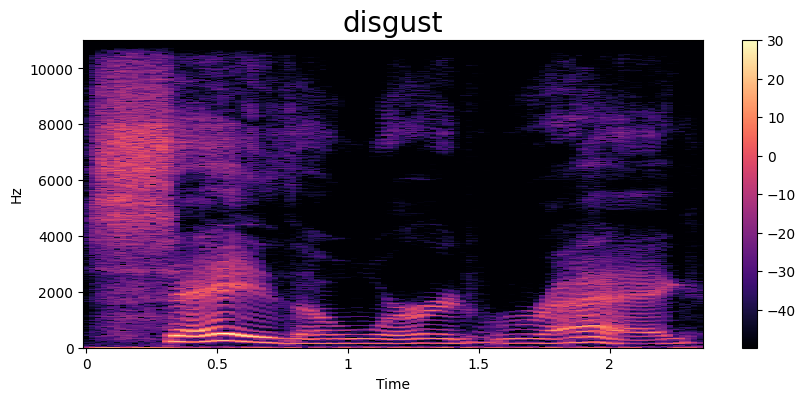

In [13]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[3]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

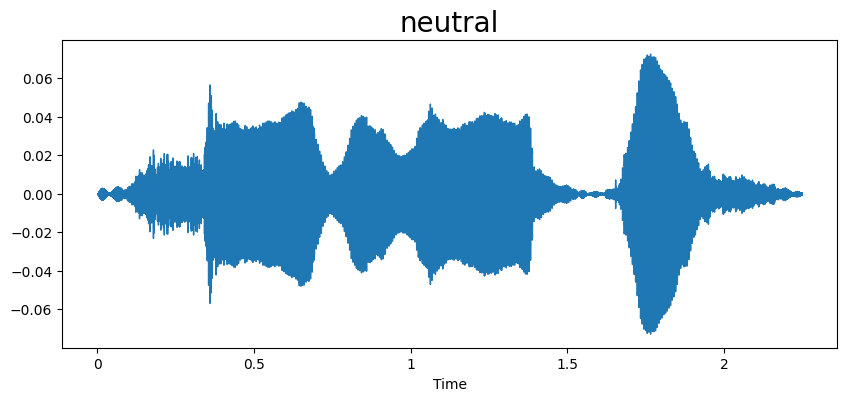

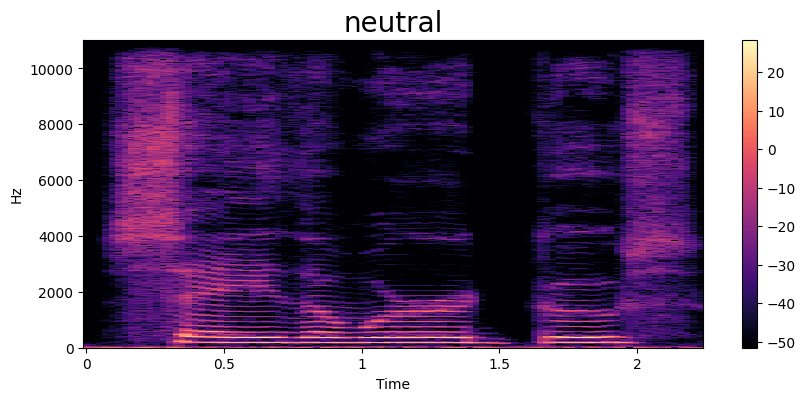

In [14]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[4]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

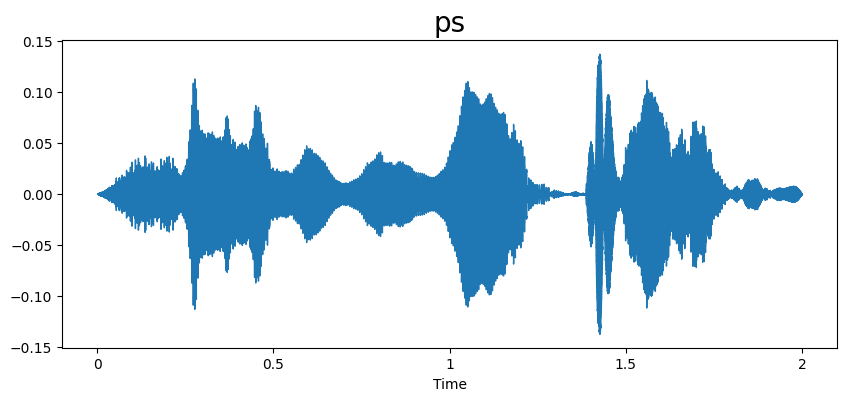

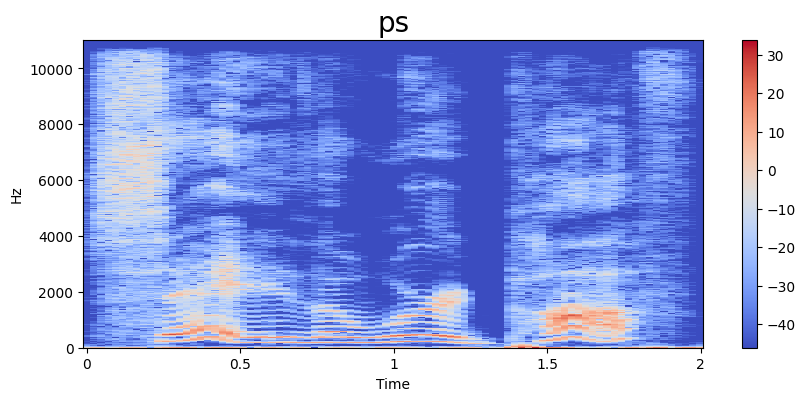

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[5]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

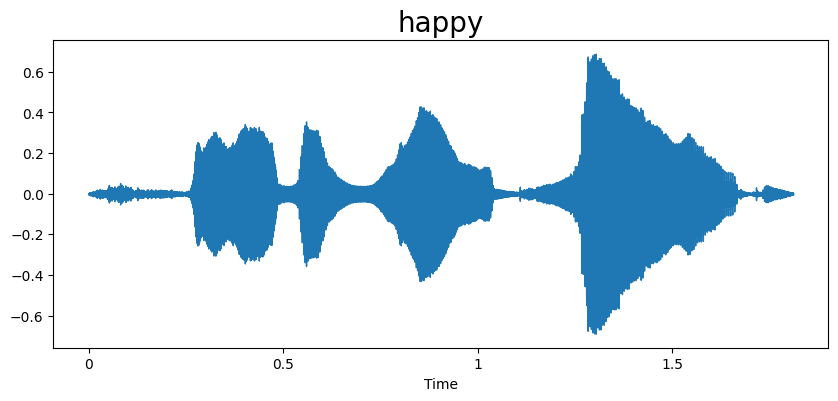

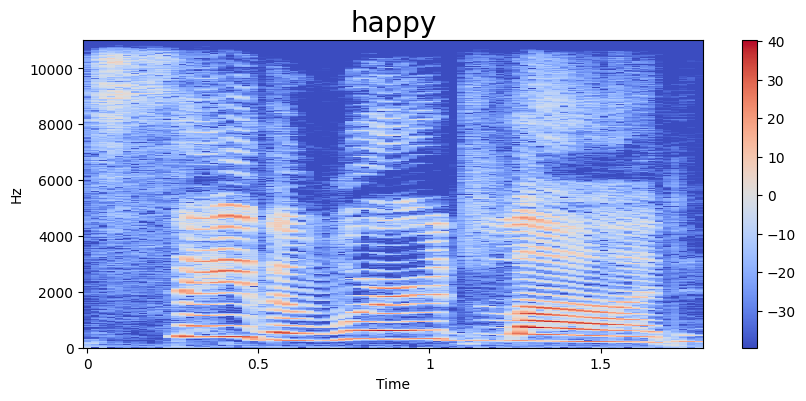

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[6]
data,sampling_rate = librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectrogram(data,sampling_rate,emotion)
Audio(path)

Feature Extraction

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc_mean = np.mean(mfcc, axis=1)  
    return mfcc_mean

In [18]:
print(extract_mfcc(df['speech'][0]))

[-285.73727     85.78295     -2.1689117   22.125532   -14.757396
   11.051347    12.412449    -3.000262     1.0844985   11.078271
  -17.41966     -8.093213     6.5879736   -4.2209525   -9.15508
    3.5214796  -13.186381    14.078853    19.66973     22.725618
   32.57464     16.325033    -3.8427284    0.8962967  -11.239264
    6.653461    -2.5883694   -7.7140164  -10.941657    -2.4007552
   -5.2812862    4.271157   -11.202216    -9.024621    -3.666985
    4.8697433   -1.6027987    2.5600514   11.454374    11.233449 ]


In [19]:
 x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
x_mfcc

0       [-285.73727, 85.78295, -2.1689117, 22.125532, ...
1       [-348.34332, 35.193233, -3.8413284, 14.658875,...
2       [-340.11435, 53.796444, -14.267782, 20.884031,...
3       [-306.63422, 21.259708, -4.4110823, 6.4871554,...
4       [-344.7548, 46.329193, -24.171413, 19.392921, ...
                              ...                        
5595    [-374.3952, 60.864998, 0.02505877, 8.431058, -...
5596    [-313.96478, 39.847843, -5.6493053, -3.8675754...
5597    [-357.54886, 77.88605, -15.224756, 2.194633, -...
5598    [-353.1474, 101.68391, -14.175897, -12.037376,...
5599    [-389.4595, 54.042767, 1.3469982, -1.4258989, ...
Name: speech, Length: 5600, dtype: object

In [21]:
x = [X for X in x_mfcc]
x = np.array(x)
x.shape

(5600, 40)

In [22]:
x = np.expand_dims(x, -1)
x.shape

(5600, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y = enc.fit_transform(df[['label']]).toarray()

print(y.shape)



(5600, 7)


Create the LSTM model

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences=False, input_shape=(40, 1)),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

2025-08-09 07:39:57.039362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-09 07:39:57.039554: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-09 07:39:57.181815: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 123)            │        61,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,747 (280.26 KB)

 Trainable params: 71,747 (280.26 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
#train the model
history = model.fit(x, y, validation_split=0.2, epochs=100, batch_size=512, shuffle=True)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - accuracy: 0.2481 - loss: 1.9232 - val_accuracy: 0.0884 - val_loss: 2.0060
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - accuracy: 0.4913 - loss: 1.6276 - val_accuracy: 0.1071 - val_loss: 2.0403
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.5909 - loss: 1.2775 - val_accuracy: 0.1080 - val_loss: 2.0116
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.6604 - loss: 0.9980 - val_accuracy: 0.2509 - val_loss: 1.6310
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.7276 - loss: 0.7732 - val_accuracy: 0.3277 - val_loss: 1.4025
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - accuracy: 0.7682 - loss: 0.6512 - val_accuracy: 0.4821 - val_loss: 1.1157
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 0.8109 - loss: 0.5129 - val_accuracy: 0.6661 - val_loss: 0.8556
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.8552 - loss: 0.4143 - val_accuracy: 0.7652 - v

## Plot the result

<function matplotlib.pyplot.show(close=None, block=None)>

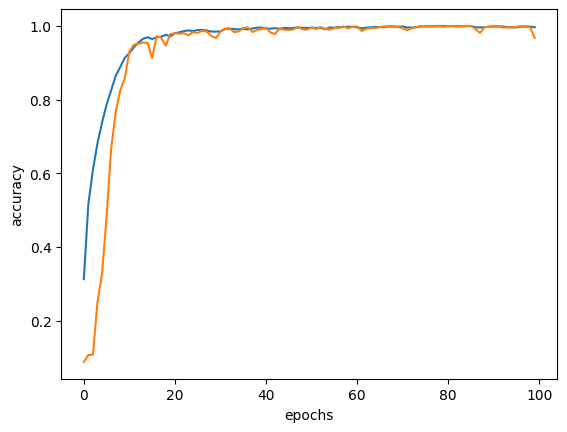

In [28]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,label = 'Train accuracy')
plt.plot(epochs,val_acc,label = 'Train val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

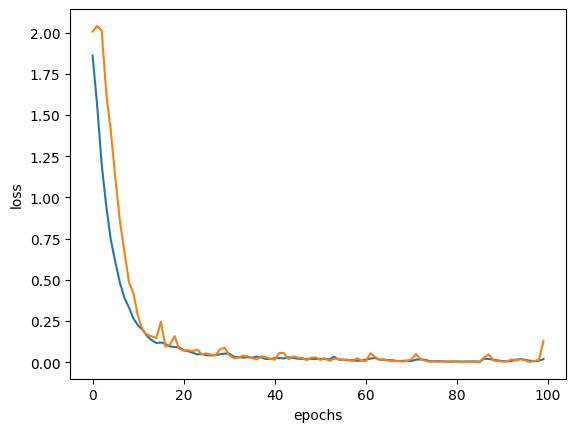

In [31]:

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,label = 'Train loss')
plt.plot(epochs,val_loss,label = 'Train val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend
plt.show